In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_curve,auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
import optuna
import joblib

In [2]:
df=pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4706,6595-COKXZ,Female,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,44.45,44.45,Yes
264,1950-KSVVJ,Female,0,Yes,No,45,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,No,Mailed check,113.30,5032.25,No
4931,4298-OYIFC,Male,0,Yes,No,15,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,103.45,1539.8,No
6231,3296-SILRA,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,76.40,76.4,Yes
4667,5537-UXXVS,Female,0,Yes,No,20,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.25,375.25,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.duplicated().sum()

0

In [6]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [7]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())

In [9]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Female': 1, 'Male': 0})

In [10]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,24,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,1,0,1,1,72,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,1,0,1,1,11,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,0,1,1,0,4,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [11]:
cat_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=cat_cols, drop_first=False)

In [12]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,0,1,0,1,29.85,29.85,...,True,False,False,True,False,False,False,False,True,False
1,5575-GNVDE,0,0,0,0,34,1,0,56.95,1889.50,...,True,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,0,0,0,0,2,1,1,53.85,108.15,...,True,False,False,True,False,False,False,False,False,True
3,7795-CFOCW,0,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,True,False,True,False,False,False
4,9237-HQITU,1,0,0,0,2,1,1,70.70,151.65,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,24,1,1,84.80,1990.50,...,False,False,True,False,True,False,False,False,False,True
7039,2234-XADUH,1,0,1,1,72,1,1,103.20,7362.90,...,False,False,True,False,True,False,False,True,False,False
7040,4801-JZAZL,1,0,1,1,11,0,1,29.60,346.45,...,True,False,False,True,False,False,False,False,True,False
7041,8361-LTMKD,0,1,1,0,4,1,1,74.40,306.60,...,True,False,False,True,False,False,False,False,False,True


In [13]:
bins = [0, 12, 24, 48, 72, np.inf]
labels = ['0-12', '12-24', '24-48', '48-72', '72+']
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)

In [14]:
internet_service_cols = ['InternetService_Fiber optic', 'InternetService_DSL']
service_features = [
    'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
    'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'
]
for col in internet_service_cols + service_features:
    if col not in df.columns:
        df[col] = 0
df['ActiveInternetService'] = df[internet_service_cols].max(axis=1)
df['ServiceCount'] = df['PhoneService'] + df['ActiveInternetService'] + df[service_features].sum(axis=1)

In [15]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group,ActiveInternetService,ServiceCount
1864,7105-MXJLL,1,1,1,0,26,1,0,60.70,1597.40,...,False,True,False,False,False,False,True,24-48,True,4
2939,8802-UNOJF,0,1,0,0,12,1,1,83.80,1029.75,...,True,False,False,False,False,False,True,12-24,True,5
957,8388-FYNPZ,0,0,0,0,4,1,0,56.75,245.15,...,True,False,False,False,False,True,False,0-12,True,4
659,2085-JVGAD,0,0,1,0,37,1,0,20.35,697.65,...,True,False,False,True,False,False,False,24-48,False,1
2736,0924-BJCRC,1,1,1,0,60,1,0,89.45,5294.60,...,True,False,False,False,False,True,False,48-72,True,4


In [16]:
df['ServiceCount'].value_counts()

ServiceCount
1    1606
5    1062
4    1041
3     996
6     827
2     727
7     525
8     259
Name: count, dtype: int64

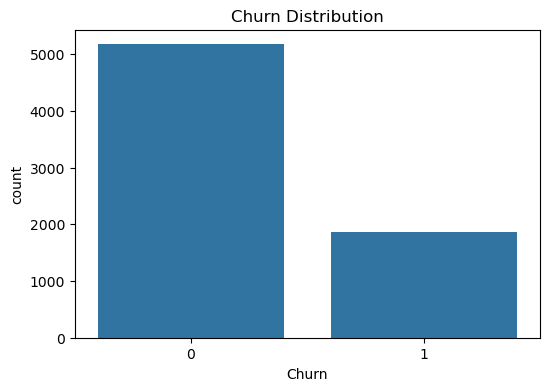

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

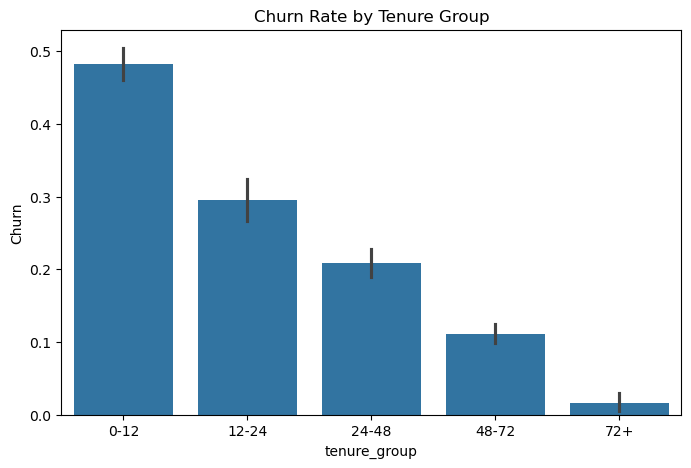

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(x='tenure_group', y='Churn', data=df)
plt.title('Churn Rate by Tenure Group')
plt.show()

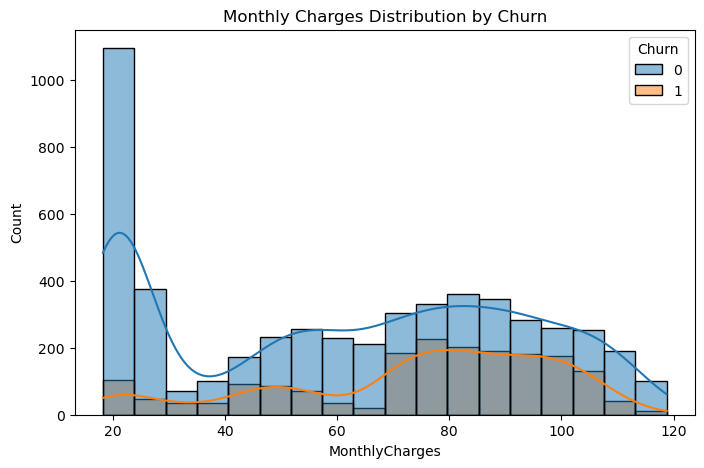

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='MonthlyCharges', kde=True, hue='Churn')
plt.title('Monthly Charges Distribution by Churn')
plt.show()

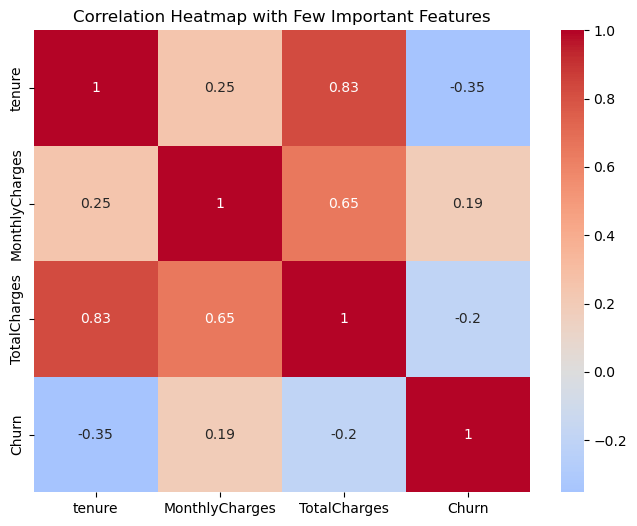

In [20]:
useful_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
df_filtered = df[useful_cols]
plt.figure(figsize=(8, 6))
sns.heatmap(df_filtered.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap with Few Important Features')
plt.show()

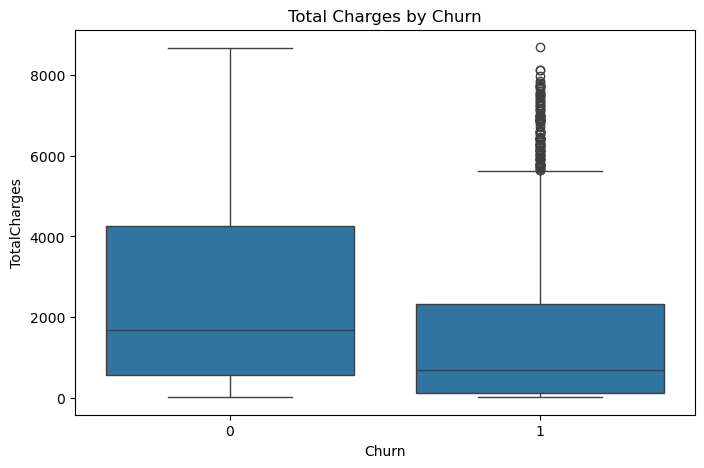

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Charges by Churn')
plt.show()

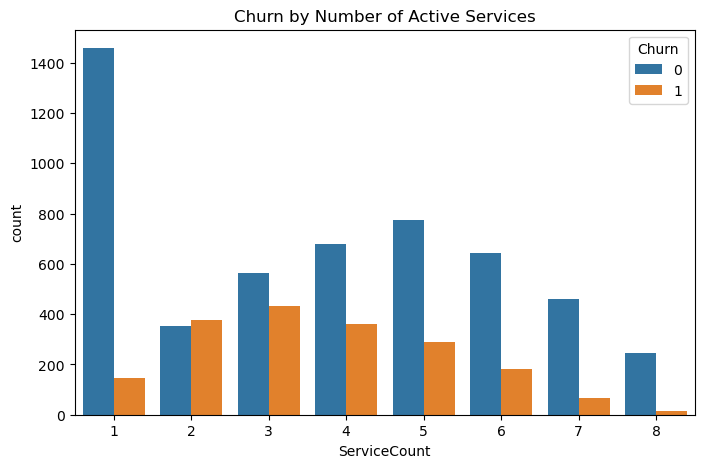

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x='ServiceCount', hue='Churn', data=df)
plt.title('Churn by Number of Active Services')
plt.show()

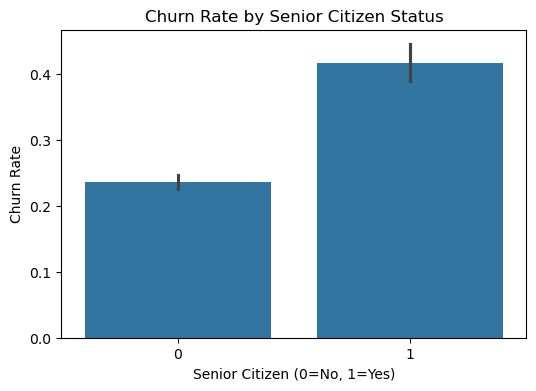

In [23]:
plt.figure(figsize=(6,4))
sns.barplot(x='SeniorCitizen', y='Churn', data=df)
plt.title('Churn Rate by Senior Citizen Status')
plt.xlabel('Senior Citizen (0=No, 1=Yes)')
plt.ylabel('Churn Rate')
plt.show()

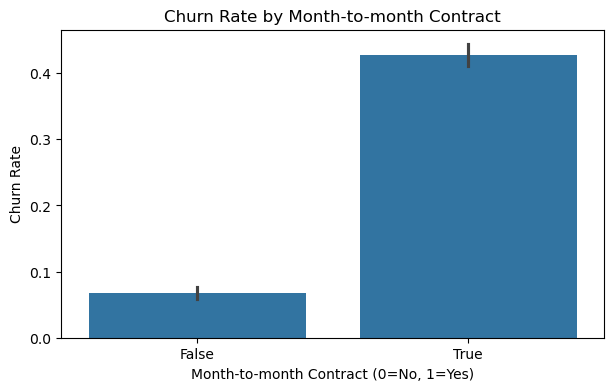

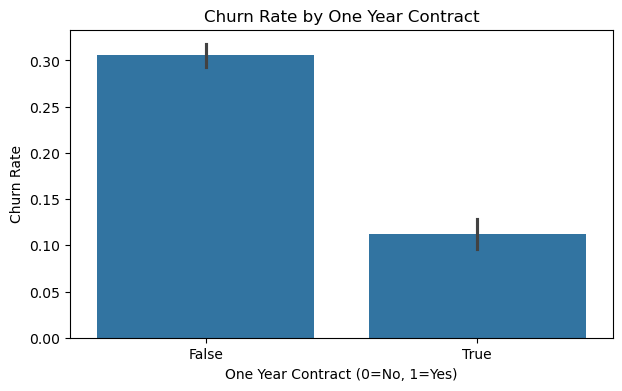

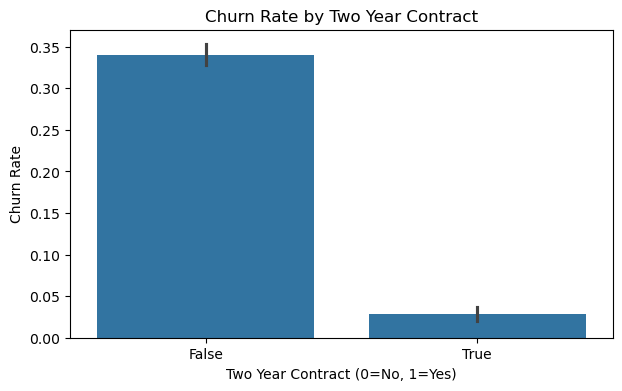

In [24]:
plt.figure(figsize=(7,4))
sns.barplot(x='Contract_Month-to-month', y='Churn', data=df)
plt.title('Churn Rate by Month-to-month Contract')
plt.ylabel('Churn Rate')
plt.xlabel('Month-to-month Contract (0=No, 1=Yes)')
plt.show()

plt.figure(figsize=(7,4))
sns.barplot(x='Contract_One year', y='Churn', data=df)
plt.title('Churn Rate by One Year Contract')
plt.ylabel('Churn Rate')
plt.xlabel('One Year Contract (0=No, 1=Yes)')
plt.show()

plt.figure(figsize=(7,4))
sns.barplot(x='Contract_Two year', y='Churn', data=df)
plt.title('Churn Rate by Two Year Contract')
plt.ylabel('Churn Rate')
plt.xlabel('Two Year Contract (0=No, 1=Yes)')
plt.show()

In [25]:
X = df.drop(['customerID', 'Churn', 'tenure_group'], axis=1)
y = df['Churn']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [29]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [31]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
gb = GradientBoostingClassifier(random_state=42)
lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
svc = SVC(class_weight='balanced', probability=True, random_state=42)

In [34]:
rf.fit(X_train_resampled, y_train_resampled)
rf_pred = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)[:,1]
print("Random Forest:")
print(classification_report(y_test, rf_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf_proba))
precision, recall, _ = precision_recall_curve(y_test, rf_proba)
pr_auc = auc(recall, precision)
print("PR-AUC:", pr_auc)

Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1035
           1       0.58      0.55      0.56       374

    accuracy                           0.78      1409
   macro avg       0.71      0.70      0.71      1409
weighted avg       0.77      0.78      0.77      1409

ROC-AUC: 0.8180875248650186
PR-AUC: 0.605150577550655


In [35]:
gb.fit(X_train_resampled, y_train_resampled)
gb_pred = gb.predict(X_test)
gb_proba = gb.predict_proba(X_test)[:,1]
print("Gradient Boosting:")
print(classification_report(y_test, gb_pred))
print("ROC-AUC:", roc_auc_score(y_test, gb_proba))
precision, recall, _ = precision_recall_curve(y_test, gb_proba)
pr_auc = auc(recall, precision)
print("PR-AUC:", pr_auc)

Gradient Boosting:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1035
           1       0.59      0.61      0.60       374

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.73      1409
weighted avg       0.79      0.78      0.79      1409

ROC-AUC: 0.8416066031155545
PR-AUC: 0.6523609833515114


In [36]:
lr.fit(X_train_scaled, y_train_resampled)
lr_pred = lr.predict(X_test_scaled)
lr_proba = lr.predict_proba(X_test_scaled)[:,1]
print("Logistic Regression:")
print(classification_report(y_test, lr_pred))
print("ROC-AUC:", roc_auc_score(y_test, lr_proba))
precision, recall, _ = precision_recall_curve(y_test, lr_proba)
pr_auc = auc(recall, precision)
print("PR-AUC:", pr_auc)

Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1035
           1       0.61      0.61      0.61       374

    accuracy                           0.79      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.79      0.79      0.79      1409

ROC-AUC: 0.839272520602444
PR-AUC: 0.631515727145712


In [37]:
svc.fit(X_train_scaled, y_train_resampled)
svc_pred = svc.predict(X_test_scaled)
svc_proba = svc.predict_proba(X_test_scaled)[:,1]
print("Support Vector Machine:")
print(classification_report(y_test, svc_pred))
print("ROC-AUC:", roc_auc_score(y_test, svc_proba))
precision, recall, _ = precision_recall_curve(y_test, svc_proba)
pr_auc = auc(recall, precision)
print("PR-AUC:", pr_auc)

Support Vector Machine:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1035
           1       0.60      0.57      0.58       374

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.72      1409
weighted avg       0.78      0.78      0.78      1409

ROC-AUC: 0.8069970807822471
PR-AUC: 0.613972782376218


In [38]:
def tune_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 150),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 5),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'class_weight': 'balanced',
        'random_state': 42
    }
    model = RandomForestClassifier(**params)
    return cross_val_score(model, X_train_resampled, y_train_resampled, cv=3, scoring='roc_auc').mean()

In [39]:
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(tune_rf, n_trials=50)
best_rf = RandomForestClassifier(**study_rf.best_params, class_weight='balanced', random_state=42)
best_rf.fit(X_train_resampled, y_train_resampled)

[I 2025-06-29 17:36:27,799] A new study created in memory with name: no-name-0ab0d874-bb48-4f48-b9bd-c732717d5a19
[I 2025-06-29 17:36:28,454] Trial 0 finished with value: 0.9217682930188209 and parameters: {'n_estimators': 63, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.9217682930188209.
[I 2025-06-29 17:36:29,567] Trial 1 finished with value: 0.9247121474653789 and parameters: {'n_estimators': 94, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.9247121474653789.
[I 2025-06-29 17:36:30,179] Trial 2 finished with value: 0.9109516896408287 and parameters: {'n_estimators': 66, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.9247121474653789.
[I 2025-06-29 17:36:30,783] Trial 3 finished with value: 0.9237970584334881 and parameters: {'n_estimators': 63, 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.9247

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=3, n_estimators=150, random_state=42)

In [39]:
def tune_gb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 150),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 5),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'random_state': 42
    }
    model = GradientBoostingClassifier(**params)
    return cross_val_score(model, X_train_resampled, y_train_resampled, cv=3, scoring='roc_auc').mean()

study_gb = optuna.create_study(direction='maximize')
study_gb.optimize(tune_gb, n_trials=50)
best_gb = GradientBoostingClassifier(**study_gb.best_params, random_state=42)
best_gb.fit(X_train_resampled, y_train_resampled)

[I 2025-06-29 10:48:06,578] A new study created in memory with name: no-name-dd02701a-2d79-4f17-9ebc-66a1a852d515
[I 2025-06-29 10:48:09,465] Trial 0 finished with value: 0.9164277295808031 and parameters: {'n_estimators': 51, 'max_depth': 5, 'learning_rate': 0.024877119734279123, 'subsample': 0.9713089531119234, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.9164277295808031.
[I 2025-06-29 10:48:13,747] Trial 1 finished with value: 0.9267606619369356 and parameters: {'n_estimators': 66, 'max_depth': 7, 'learning_rate': 0.020295682254398848, 'subsample': 0.6133073689687909, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.9267606619369356.
[I 2025-06-29 10:48:16,246] Trial 2 finished with value: 0.9259395512304698 and parameters: {'n_estimators': 57, 'max_depth': 5, 'learning_rate': 0.038727192419250434, 'subsample': 0.6814362071318489, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.9267606619369

GradientBoostingClassifier(learning_rate=0.07287100438037217, max_depth=7,
                           min_samples_leaf=4, min_samples_split=5,
                           n_estimators=139, random_state=42,
                           subsample=0.8743880591005905)

In [40]:
def tune_lr(trial):
    params = {
        'C': trial.suggest_float('C', 0.01, 10.0, log=True),
        'penalty': 'l2',
        'solver': 'lbfgs',
        'class_weight': 'balanced',
        'max_iter': 1000,
        'random_state': 42
    }
    model = LogisticRegression(**params)
    return cross_val_score(model, X_train_scaled, y_train_resampled, cv=3, scoring='roc_auc').mean()

study_lr = optuna.create_study(direction='maximize')
study_lr.optimize(tune_lr, n_trials=50)
best_lr = LogisticRegression(**study_lr.best_params, class_weight='balanced', max_iter=1000, random_state=42)
best_lr.fit(X_train_scaled, y_train_resampled)

[I 2025-06-29 10:56:36,759] A new study created in memory with name: no-name-6a9f8df1-a379-4548-800b-b5a349e23001
[I 2025-06-29 10:56:36,872] Trial 0 finished with value: 0.923914817292443 and parameters: {'C': 0.0936209171215661}. Best is trial 0 with value: 0.923914817292443.
[I 2025-06-29 10:56:37,004] Trial 1 finished with value: 0.9243143732842234 and parameters: {'C': 0.12469901377098627}. Best is trial 1 with value: 0.9243143732842234.
[I 2025-06-29 10:56:37,185] Trial 2 finished with value: 0.9257182337994473 and parameters: {'C': 0.5681583602821824}. Best is trial 2 with value: 0.9257182337994473.
[I 2025-06-29 10:56:37,388] Trial 3 finished with value: 0.926874315891593 and parameters: {'C': 6.022093246057286}. Best is trial 3 with value: 0.926874315891593.
[I 2025-06-29 10:56:37,500] Trial 4 finished with value: 0.922717820192943 and parameters: {'C': 0.04772001643176307}. Best is trial 3 with value: 0.926874315891593.
[I 2025-06-29 10:56:37,619] Trial 5 finished with value:

LogisticRegression(C=9.846020262906286, class_weight='balanced', max_iter=1000,
                   random_state=42)

In [45]:
def tune_svc(trial):
    params = {
        'C': trial.suggest_float('C', 0.1, 10.0, log=True),
        'kernel': trial.suggest_categorical('kernel', ['rbf', 'linear']),
        'class_weight': 'balanced',
        'probability': False,
        'random_state': 42
    }
    model = SVC(**params)
    return cross_val_score(model, X_train_scaled, y_train_resampled, cv=3, scoring='roc_auc').mean()

study_svc = optuna.create_study(direction='maximize')
study_svc.optimize(tune_svc, n_trials=30, n_jobs=-1) 
best_svc = SVC(**study_svc.best_params, class_weight='balanced', probability=True, random_state=42)
best_svc.fit(X_train_scaled, y_train_resampled)

[I 2025-06-29 11:23:35,316] A new study created in memory with name: no-name-ec560629-52c5-48b9-be40-e1a7f7071386
[I 2025-06-29 11:24:02,473] Trial 0 finished with value: 0.9231459256446541 and parameters: {'C': 0.7161314664704205, 'kernel': 'linear'}. Best is trial 0 with value: 0.9231459256446541.
[I 2025-06-29 11:24:04,237] Trial 15 finished with value: 0.9228393008884886 and parameters: {'C': 0.305068824675249, 'kernel': 'linear'}. Best is trial 0 with value: 0.9231459256446541.
[I 2025-06-29 11:24:05,684] Trial 14 finished with value: 0.9228697739372511 and parameters: {'C': 0.5258522614540855, 'kernel': 'linear'}. Best is trial 0 with value: 0.9231459256446541.
[I 2025-06-29 11:24:05,864] Trial 1 finished with value: 0.9227708143988983 and parameters: {'C': 0.4304029506130153, 'kernel': 'linear'}. Best is trial 0 with value: 0.9231459256446541.
[I 2025-06-29 11:24:06,204] Trial 13 finished with value: 0.9231895412920333 and parameters: {'C': 1.1261379667316866, 'kernel': 'linear'

SVC(C=3.6113986195325514, class_weight='balanced', kernel='linear',
    probability=True, random_state=42)

In [54]:
rf_pred = best_rf.predict(X_test)
rf_proba = best_rf.predict_proba(X_test)[:,1]
print("Random Forest (Tuned):")
print(classification_report(y_test, rf_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf_proba))
precision, recall, _ = precision_recall_curve(y_test, rf_proba)
pr_auc = auc(recall, precision)
print("PR-AUC:", pr_auc)

Random Forest (Tuned):
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1035
           1       0.56      0.65      0.60       374

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.77      0.77      1409

ROC-AUC: 0.8352398666976674
PR-AUC: 0.626955989417784


In [53]:
gb_pred = best_gb.predict(X_test)
gb_proba = best_gb.predict_proba(X_test)[:,1]
print("Gradient Boosting (Tuned):")
print(classification_report(y_test, gb_pred))
print("ROC-AUC:", roc_auc_score(y_test, gb_proba))
precision, recall, _ = precision_recall_curve(y_test, gb_proba)
pr_auc = auc(recall, precision)
print("PR-AUC:", pr_auc)

Gradient Boosting (Tuned):
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1035
           1       0.60      0.56      0.58       374

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.72      1409
weighted avg       0.78      0.78      0.78      1409

ROC-AUC: 0.8317148466764835
PR-AUC: 0.6315805551857886


In [52]:
lr_pred = best_lr.predict(X_test_scaled)
lr_proba = best_lr.predict_proba(X_test_scaled)[:,1]
print("Logistic Regression (Tuned):")
print(classification_report(y_test, lr_pred))
print("ROC-AUC:", roc_auc_score(y_test, lr_proba))
precision, recall, _ = precision_recall_curve(y_test, lr_proba)
pr_auc = auc(recall, precision)
print("PR-AUC:", pr_auc)

Logistic Regression (Tuned):
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1035
           1       0.61      0.60      0.61       374

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409

ROC-AUC: 0.8387842620579193
PR-AUC: 0.6279101562501802


In [51]:
svc_pred = best_svc.predict(X_test_scaled)
svc_proba = best_svc.predict_proba(X_test_scaled)[:,1]
print("Support Vector Machine (Tuned):")
print(classification_report(y_test, svc_pred))
print("ROC-AUC:", roc_auc_score(y_test, svc_proba))
precision, recall, _ = precision_recall_curve(y_test, svc_proba)
pr_auc = auc(recall, precision)
print("PR-AUC:", pr_auc)

Support Vector Machine (Tuned):
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1035
           1       0.61      0.60      0.61       374

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409

ROC-AUC: 0.8355317884729648
PR-AUC: 0.6262206962756498


Customer count by tenure cohort:
tenure_group
0-12     2069
12-24    1047
24-48    1624
48-72    1941
72+       362
dtype: int64
Churn rate by tenure cohort:
tenure_group
0-12     0.482842
12-24    0.295129
24-48    0.208744
48-72    0.111283
72+      0.016575
Name: Churn, dtype: float64


C:\Users\samra\AppData\Local\Temp\ipykernel_4160\2604733374.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cohort_counts = df.groupby('tenure_group').size()
C:\Users\samra\AppData\Local\Temp\ipykernel_4160\2604733374.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cohort_churn = df.groupby('tenure_group')['Churn'].mean()


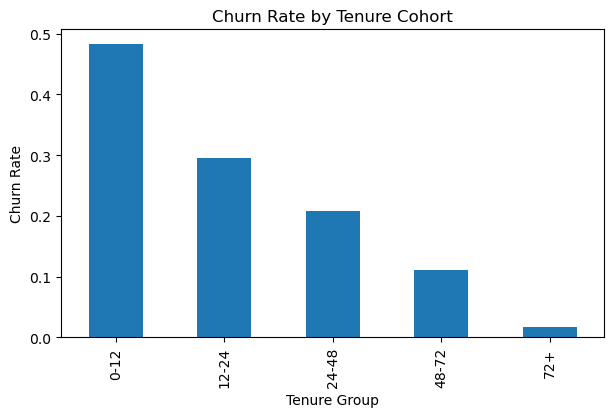

In [65]:
cohort_counts = df.groupby('tenure_group').size()
print("Customer count by tenure cohort:")
print(cohort_counts)
cohort_churn = df.groupby('tenure_group')['Churn'].mean()
print("Churn rate by tenure cohort:")
print(cohort_churn)
plt.figure(figsize=(7,4))
cohort_churn.plot(kind='bar')
plt.title('Churn Rate by Tenure Cohort')
plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate')
plt.show()

In [79]:
rfm = df[['tenure', 'ServiceCount', 'TotalCharges']].copy()
rfm.columns = ['Recency', 'Frequency', 'Monetary']
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Segment'] = kmeans.fit_predict(rfm)

In [80]:
rfm_summary = rfm.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].mean().round(2)
print(rfm_summary)
rfm['Segment'].value_counts()

         Recency  Frequency  Monetary
Segment                              
0          36.77       3.54   1878.17
1          66.26       6.46   6641.97
2          11.71       2.36    410.53
3          51.67       5.28   4117.78


Segment
2    3121
0    1715
3    1224
1     983
Name: count, dtype: int64

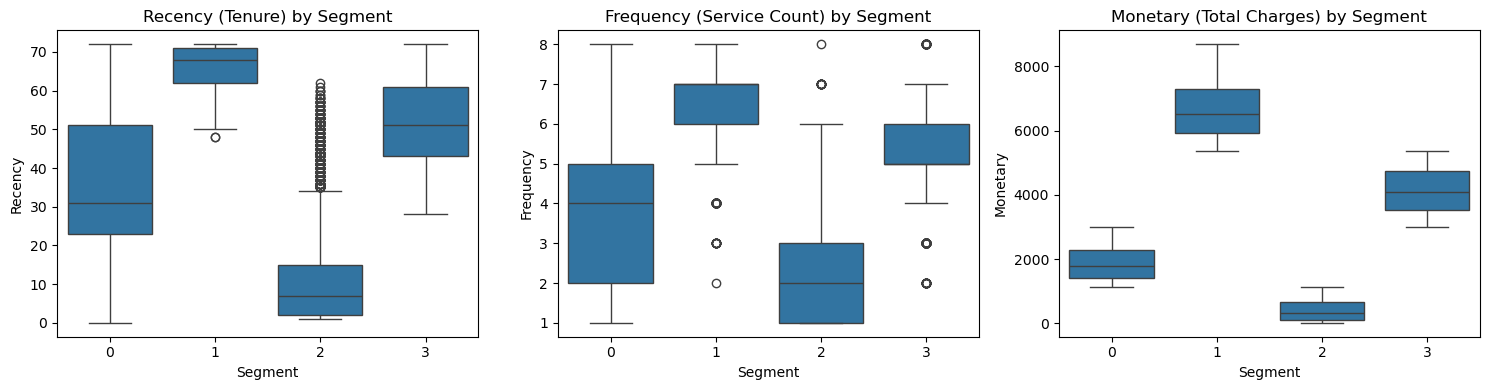

In [81]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.boxplot(x='Segment', y='Recency', data=rfm)
plt.title('Recency (Tenure) by Segment')

plt.subplot(1, 3, 2)
sns.boxplot(x='Segment', y='Frequency', data=rfm)
plt.title('Frequency (Service Count) by Segment')

plt.subplot(1, 3, 3)
sns.boxplot(x='Segment', y='Monetary', data=rfm)
plt.title('Monetary (Total Charges) by Segment')

plt.tight_layout()
plt.show()

In [ ]:
joblib.dump(lr, 'logistic_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
df.to_csv('telco_processed_for_streamlit.csv', index=False)
feature_columns = list(X_train.columns)
joblib.dump(feature_columns, 'feature_columns.pkl')
print("Files Saved")